In [1]:
%matplotlib inline

In [2]:
from turbidity import *
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import simps

In [3]:
## work in micrometres

In [4]:
################################################################################
# Example 1
# let’s calculate the turbidity spectrum for a sample that’s unilamellar and
# compare it to a sample that's bi-lamellar
################################################################################

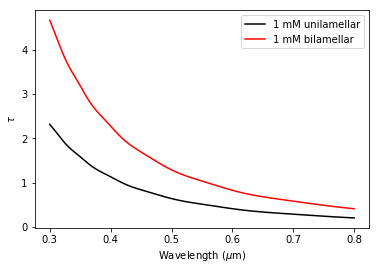

In [6]:
# choose wavelengths to work with
# e.g. 300 to 800 nm
WL = np.linspace(0.3,0.8,100)

# choose a radius
# e.g. 500 nm
radius = 0.5

# calculate sample extinction for unilamellar vesicles
ext_uv = sample_extinction(extinction_guv_wld(wls=WL, t=l, rad=radius), area_guv(Rs=radius), concentration=1e-3)

# calculate sample extinction for bilamellar vesicles
ext_bv = sample_extinction(extinction_olv_wld(layers=2, wls=WL, rad=radius, s=4*l, t=l),area_olv(layers=2,Rs=[radius],s=4*l),concentration=1e-3)

# plot to compare
plt.plot(WL, ext_uv, 'k', label='1 mM unilamellar')
plt.plot(WL, ext_bv, 'r', label='1 mM bilamellar')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel(r'$\tau$')
plt.legend()

In [7]:
################################################################################
# Example 2
# let’s calculate the turbidity for a sample that’s polydisperse, with a lognormal
# distribution, arithmetic mean radius of 100 nm and standard deviation of 50 nm
################################################################################

0.99987811083123934

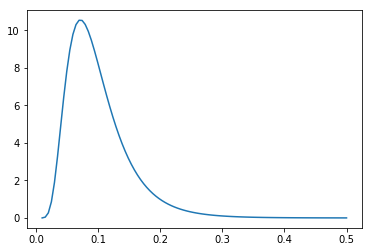

In [8]:
# choose wavelengths to work with
WL = np.linspace(0.3,0.8,100)

# choose range of radii to work with
radii = np.linspace(0.01,0.5,100)
m, s = lognormS(0.1,0.05) # get lognormal statistics mu and sigma as input for distribution

# check what the size distribution looks like
plt.plot(radii,p(radii,m,s))

# sanity check: what's the area under the curve? are we working with the correct radii?
simps(p(radii,m,s),radii)

In [9]:
# calculate the sample extinction, as weighted by the distribution

exampleturbidity = weighted_turb(t=l,c=1e-3, m=m, s=s, R=radii, wls=WL)
exampleturbidity[1] # this should be 1, otherwise we didn't choose the right radii

TypeError: extinction_guv_wld() got an unexpected keyword argument 'wl'

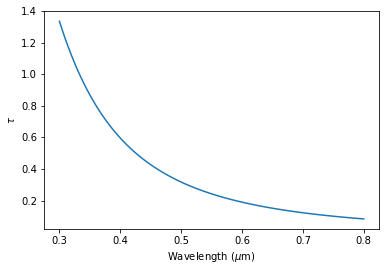

In [11]:
plt.plot(WL, exampleturbidity[0])
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel(r'$\tau$')